<a href="https://colab.research.google.com/github/poojatambe/OCR_for_text_extraction/blob/main/docTr_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install python-doctr[tf]
!pip install python-doctr[torch]

In [5]:
!pip install rapidfuzz==2.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: rapidfuzz
    Found existing installation: rapidfuzz 3.1.2
    Uninstalling rapidfuzz-3.1.2:
      Successfully uninstalled rapidfuzz-3.1.2


In [1]:
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [69]:
predictor = ocr_predictor(det_arch='db_mobilenet_v3_large', reco_arch='crnn_vgg16_bn', pretrained=True, detect_orientation= True)

In [70]:
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), method='bilinear')
      (normalize): Normalize(mean=[0.7979999780654907, 0.7850000262260437, 0.7720000147819519], std=[0.2639999985694885, 0.27489998936653137, 0.28700000047683716])
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter()
      (fpn): FeaturePyramidNetwork(channels=128)
      (probability_head): <keras.engine.sequential.Sequential object at 0x77fa9e8068f0>
      (threshold_head): <keras.engine.sequential.Sequential object at 0x77fa9efc80a0>
      (postprocessor): DBPostProcessor(bin_thresh=0.3, box_thresh=0.1)
    )
  )
  (reco_predictor): RecognitionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(32, 128), method='bilinear', preserve_aspect_ratio=True, symmetric_pad=False)
      (normalize): Normalize(mean=[0.6940000057220459, 0.6949999928474426, 0.6930000185966492], std=[0.298999

In [71]:
doc= DocumentFile.from_images('/content/sample_img2.png')
result = predictor(doc)
print(result)

Document(
  (pages): [Page(
    dimensions=(146, 345)
    (blocks): [
      Block(
        (lines): [
          Line(
            (words): [
              Word(value='-', confidence=0.99),
              Word(value='-', confidence=1.0),
            ]
          ),
          Line(
            (words): [Word(value='-', confidence=1.0)]
          ),
        ]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='-', confidence=1.0),
            Word(value='-', confidence=0.99),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='-', confidence=0.85)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='-', confidence=0.85)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='-', confidence=0.99)]
        )]
        (artefacts): []
      ),


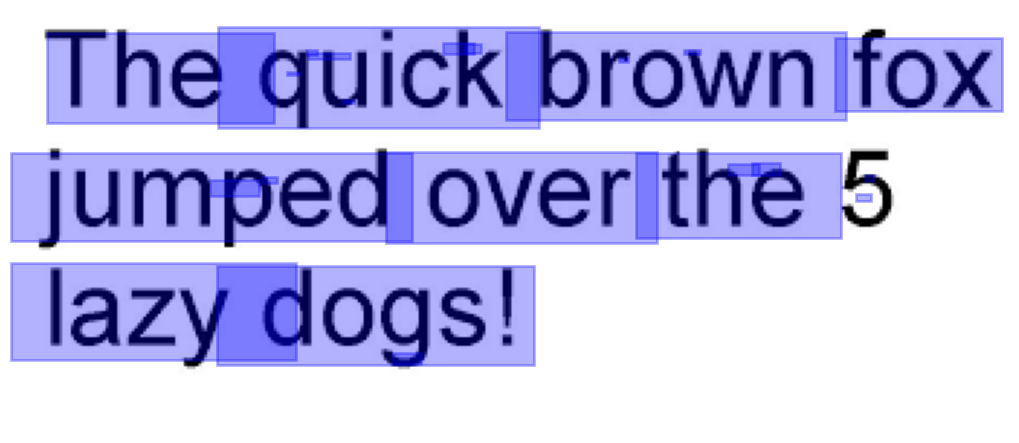

In [72]:
result.show(doc)

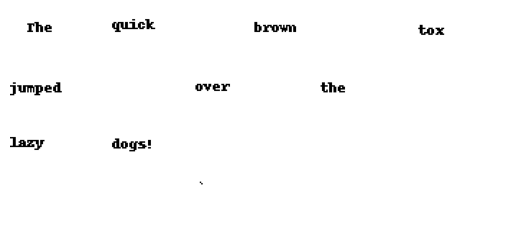

In [73]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

In [74]:
json_output = result.export()

In [75]:
print(json_output)

{'pages': [{'page_idx': 0, 'dimensions': (146, 345), 'orientation': {'value': 0, 'confidence': 1.0}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.275390625, 0.091796875), (0.3388671875, 0.1513671875)), 'lines': [{'geometry': ((0.294921875, 0.091796875), (0.3388671875, 0.11328125)), 'words': [{'value': '-', 'confidence': 0.9881734251976013, 'geometry': ((0.294921875, 0.091796875), (0.3056640625, 0.103515625))}, {'value': '-', 'confidence': 0.9997653961181641, 'geometry': ((0.296875, 0.09765625), (0.3388671875, 0.11328125))}]}, {'geometry': ((0.275390625, 0.142578125), (0.2880859375, 0.1513671875)), 'words': [{'value': '-', 'confidence': 0.9991449117660522, 'geometry': ((0.275390625, 0.142578125), (0.2880859375, 0.1513671875))}]}], 'artefacts': []}, {'geometry': ((0.431640625, 0.076171875), (0.4697265625, 0.1005859375)), 'lines': [{'geometry': ((0.431640625, 0.076171875), (0.4697265625, 0.1005859375)), 'words': [{'value': '-', 'confidence': 0.9997997283935